<a href="https://colab.research.google.com/github/hatkiet/Project_4/blob/Mia-branch/Heart_Attack__ML_RF_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [4]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_with_nans.csv")
# Display sample data
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
# Find the duplicated values
df.duplicated().sum()

# Drop duplicated values
df.drop_duplicates(inplace=True)

# Check again information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23494 entries, 0 to 23495
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      23494 non-null  object 
 1   Sex                        23494 non-null  object 
 2   GeneralHealth              23416 non-null  object 
 3   PhysicalHealthDays         22784 non-null  float64
 4   MentalHealthDays           22893 non-null  float64
 5   LastCheckupTime            22988 non-null  object 
 6   PhysicalActivities         23421 non-null  object 
 7   SleepHours                 23183 non-null  float64
 8   RemovedTeeth               21632 non-null  object 
 9   HadHeartAttack             23267 non-null  object 
 10  HadAngina                  23197 non-null  object 
 11  HadStroke                  23383 non-null  object 
 12  HadAsthma                  23373 non-null  object 
 13  HadSkinCancer              23294 non-null  object 


In [6]:
# Finding NAN values
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

,NaN Values,(%) of NaN Values
TetanusLast10Tdap,4411,18.78
PneumoVaxEver,3929,16.72
HIVTesting,3684,15.68
ChestScan,3041,12.94
CovidPos,2759,11.74
HighRiskLastYear,2733,11.63
FluVaxLast12,2511,10.69
AlcoholDrinkers,2460,10.47
BMI,2243,9.55
ECigaretteUsage,1897,8.07


In [7]:
# Renaming columns using a dictionary
df1 = df.rename(columns={
    'AgeCategory': "Age",
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroke",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Drinking"
})
df1

,State,Sex,GenHealth,PhysicalHealth,MentalHealth,LastCheckupTime,PhysicalActivity,SleepHours,RemovedTeeth,HeartAttack,...,HeightInMeters,WeightInKilograms,BMI,Drinking,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23491,Arkansas,Male,Poor,30.0,0.0,Within past year (anytime less than 12 months ...,No,12.0,1 to 5,No,...,1.68,81.65,29.05,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
23492,Arkansas,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,9.0,None of them,No,...,1.57,72.57,29.26,No,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
23493,Arkansas,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.85,77.11,22.43,No,Yes,No,No,"Yes, received tetanus shot, but not Tdap",No,Yes
23494,Arkansas,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,9.0,None of them,No,...,1.75,82.55,26.88,Yes,No,Yes,No,"Yes, received Tdap",No,No


In [8]:
# Remove the missing values
df1 = df1.dropna()

# Check again the missing values
df1.isna().sum()

State                        0
Sex                          0
GenHealth                    0
PhysicalHealth               0
MentalHealth                 0
LastCheckupTime              0
PhysicalActivity             0
SleepHours                   0
RemovedTeeth                 0
HeartAttack                  0
Angina                       0
Stroke                       0
Asthma                       0
SkinCancer                   0
HadCOPD                      0
Depressed                    0
KidneyDisease                0
HadArthritis                 0
Diabetes                     0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DiffWalking                  0
DifficultyDressingBathing    0
DifficultyErrands            0
Smoking                      0
ECigaretteUsage              0
ChestScan                    0
Race                         0
Age                          0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [9]:
!pip install hvplot
import hvplot.pandas
df1.hvplot.scatter(
    x="Age",
    y="GenHealth",
    by="HeartAttack"
)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 2.1 MB/s eta 0:00:00


:NdOverlay   [HeartAttack]
   :Scatter   [Age]   (GenHealth)

In [10]:
df1.columns

Index(['State', 'Sex', 'GenHealth', 'PhysicalHealth', 'MentalHealth',
       'LastCheckupTime', 'PhysicalActivity', 'SleepHours', 'RemovedTeeth',
       'HeartAttack', 'Angina', 'Stroke', 'Asthma', 'SkinCancer', 'HadCOPD',
       'Depressed', 'KidneyDisease', 'HadArthritis', 'Diabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DiffWalking', 'DifficultyDressingBathing',
       'DifficultyErrands', 'Smoking', 'ECigaretteUsage', 'ChestScan', 'Race',
       'Age', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'Drinking',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [11]:
# Import PCA module
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [12]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=3)

In [13]:
# Assuming 'df1' is your DataFrame
# Select only numerical columns for PCA
numerical_cols = df1.select_dtypes(include=['number']).columns
df_numerical = df1[numerical_cols]

# Instantiate the PCA instance
pca = PCA(n_components=3)

# Fit the PCA model on the numerical data
df1_transformed = pca.fit_transform(df_numerical)

# Review the first 5 rows of the transformed data
df1_transformed[:5]

array([[-11.80916281,  -2.7449684 ,  -3.03937232],
       [ 11.40170065,  -6.67105672,  -0.36498869],
       [ 24.92679908,  -7.18738594,  -0.32437294],
       [  7.46919897,  -2.61390564,  -3.55025397],
       [ -2.86060975,   5.77648713,   9.42448506]])

In [14]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.75065373, 0.15227068, 0.07811807])

In [15]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(df1_transformed, columns=['PC1', 'PC2', 'PC3'])

#Review the PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
0,-11.809163,-2.744968,-3.039372
1,11.401701,-6.671057,-0.364989
2,24.926799,-7.187386,-0.324373
3,7.469199,-2.613906,-3.550254
4,-2.860610,5.776487,9.424485


In [16]:
!pip install hvplot
import hvplot.pandas

# Create a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Apppend the value of the computed intertia from the 'inertia_' attribute of the KMeans model instance
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,7.721151e+06
1,2,4.174002e+06
2,3,3.050320e+06
3,4,2.484012e+06
4,5,2.075944e+06


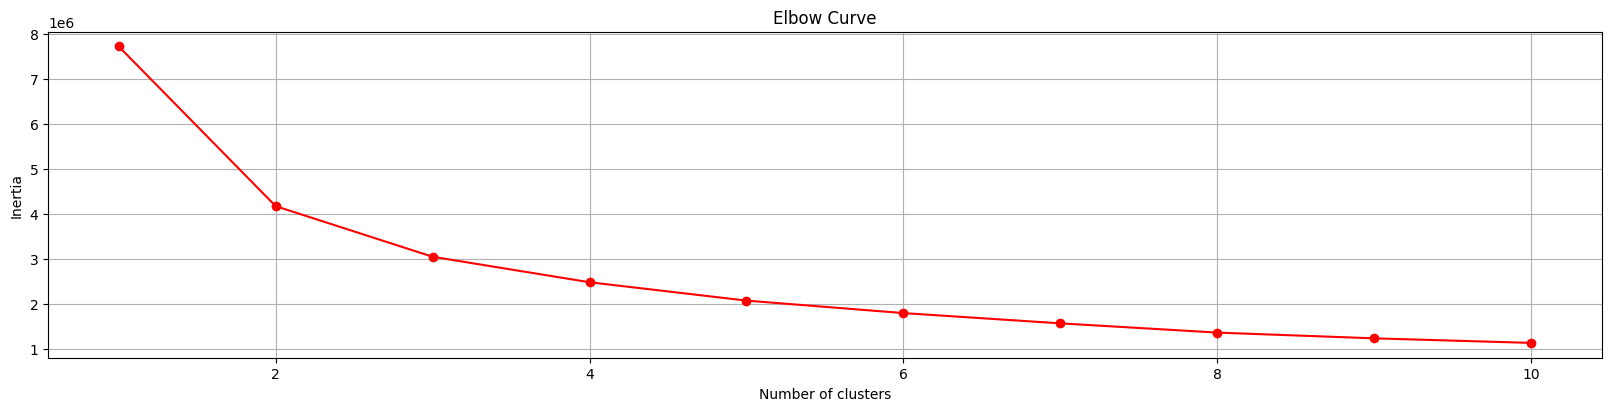

In [17]:
plt.figure(figsize=(16, 4), layout='constrained')
plt.plot(k,inertia, marker='o', color='r')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [18]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
k_3 = model.predict(pca_df)

# Create a copy of the PCA DataFrame
pca_df_predictions = pca_df.copy()

# Add the predicted class columns
pca_df_predictions['heart_segments'] = k_3

# Review the DataFrame
pca_df_predictions.head()

,PC1,PC2,PC3,heart_segments
0,-11.809163,-2.744968,-3.039372,1
1,11.401701,-6.671057,-0.364989,0
2,24.926799,-7.187386,-0.324373,2
3,7.469199,-2.613906,-3.550254,0
4,-2.860610,5.776487,9.424485,0


In [19]:
# Plot the clusters
pca_df_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="heart_segments",
    title="Clusters of Heart Disease"
)

:NdOverlay   [heart_segments]
   :Scatter   [PC1]   (PC2)

In [20]:
model.score(pca_df)

-3050319.9520773776

## Clean the code then go again

In [21]:
df1.head()

,State,Sex,GenHealth,PhysicalHealth,MentalHealth,LastCheckupTime,PhysicalActivity,SleepHours,RemovedTeeth,HeartAttack,...,HeightInMeters,WeightInKilograms,BMI,Drinking,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [22]:
# Remove unneccessary columns using drop()
columns_to_drop = [
    'LastCheckupTime', 'RemovedTeeth', 'HadCOPD',
    'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating',
    'DifficultyDressingBathing', 'DifficultyErrands',
    'HeightInMeters', 'WeightInKilograms',
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear', 'CovidPos'
]
df2 = df1.drop(columns=columns_to_drop)
df2.head()

,State,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepHours,HeartAttack,Angina,Stroke,...,KidneyDisease,Diabetes,DiffWalking,Smoking,ECigaretteUsage,ChestScan,Race,Age,BMI,Drinking
342,Alabama,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,...,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,27.99,No
343,Alabama,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,...,No,Yes,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,30.13,No
345,Alabama,Male,Very good,0.0,0.0,No,8.0,No,No,No,...,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,31.66,Yes
346,Alabama,Female,Fair,5.0,0.0,Yes,9.0,No,No,No,...,No,No,Yes,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,31.32,No
347,Alabama,Female,Good,3.0,15.0,Yes,5.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,33.07,No


In [23]:
# Renaming columns using a dictionary
df2 = df2.rename(columns={
    'AgeCategory': "Age",
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroke",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Drinking"
})
df2

,State,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepHours,HeartAttack,Angina,Stroke,...,KidneyDisease,Diabetes,DiffWalking,Smoking,ECigaretteUsage,ChestScan,Race,Age,BMI,Drinking
342,Alabama,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,...,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,27.99,No
343,Alabama,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,...,No,Yes,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,30.13,No
345,Alabama,Male,Very good,0.0,0.0,No,8.0,No,No,No,...,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,31.66,Yes
346,Alabama,Female,Fair,5.0,0.0,Yes,9.0,No,No,No,...,No,No,Yes,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,31.32,No
347,Alabama,Female,Good,3.0,15.0,Yes,5.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,33.07,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23486,Arkansas,Female,Very good,2.0,1.0,Yes,8.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 18 to 24,18.99,Yes
23489,Arkansas,Male,Very good,0.0,6.0,Yes,6.0,No,No,No,...,No,No,No,Never smoked,Not at all (right now),No,Hispanic,Age 45 to 49,28.27,Yes
23491,Arkansas,Male,Poor,30.0,0.0,No,12.0,No,No,No,...,No,No,Yes,Never smoked,Not at all (right now),Yes,"Multiracial, Non-Hispanic",Age 80 or older,29.05,No
23493,Arkansas,Female,Very good,0.0,0.0,Yes,8.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,22.43,No


Convert categorical variables to numerical variables

In [24]:
# Identify binary columns
# The condition checks if the column has exactly 2 unique values using the nunique()
binary_cols = [col for col in df2.columns if df1[col].nunique() == 2]
binary_cols

['Sex',
 'PhysicalActivity',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'DiffWalking',
 'ChestScan',
 'Drinking']

In [25]:
# Copy df1 to df2
df3 = df2.copy()

# Then, drop column named "State"
df3 = df3.drop("State", axis=1)

In [26]:
df3.columns

Index(['Sex', 'GenHealth', 'PhysicalHealth', 'MentalHealth',
       'PhysicalActivity', 'SleepHours', 'HeartAttack', 'Angina', 'Stroke',
       'Asthma', 'SkinCancer', 'Depressed', 'KidneyDisease', 'Diabetes',
       'DiffWalking', 'Smoking', 'ECigaretteUsage', 'ChestScan', 'Race', 'Age',
       'BMI', 'Drinking'],
      dtype='object')

In [27]:
# Convert and verify binary columns
all_binary = True

for col in binary_cols:
    unique_values = df3[col].unique()
    if set(unique_values) != {0, 1}:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df3[col] = df3[col].map(mapping)

    # Verify conversion
    if set(df3[col].unique()) != {0, 1}:
        all_binary = False
        print(f"Column {col} has non-binary values: {set(df3[col].unique())}")

if all_binary:
    print("All binary columns have been successfully converted to 0 and 1.")
else:
    print("Some columns still have non-binary values.")

All binary columns have been successfully converted to 0 and 1.


In [28]:
heart_dummies = pd.get_dummies(df3, columns=["Age", "Race", "GenHealth", "DiffWalking", "Smoking", "Drinking"])
heart_dummies.head()

,Sex,PhysicalHealth,MentalHealth,PhysicalActivity,SleepHours,HeartAttack,Angina,Stroke,Asthma,SkinCancer,...,GenHealth_Poor,GenHealth_Very good,DiffWalking_0,DiffWalking_1,Smoking_Current smoker - now smokes every day,Smoking_Current smoker - now smokes some days,Smoking_Former smoker,Smoking_Never smoked,Drinking_0,Drinking_1
342,0,4.0,0.0,0,9.0,0,0,0,0,0,...,False,True,True,False,False,False,True,False,True,False
343,1,0.0,0.0,0,6.0,0,0,0,0,0,...,False,True,True,False,False,False,True,False,True,False
345,1,0.0,0.0,1,8.0,0,0,0,0,0,...,False,True,False,True,False,False,True,False,False,True
346,0,5.0,0.0,0,9.0,0,0,0,0,1,...,False,False,False,True,False,False,False,True,True,False
347,0,3.0,15.0,0,5.0,0,0,0,0,0,...,False,False,True,False,False,False,False,True,True,False


In [29]:
# Initialize the K-Means model with n_clusters = 3
model = KMeans(n_clusters=3)

# Random Forest Solution

## Loading Encoded Data

In [30]:
# Define features set
X = df3.copy()
X.drop("HeartAttack", axis=1, inplace=True)
X.head()

,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepHours,Angina,Stroke,Asthma,SkinCancer,...,KidneyDisease,Diabetes,DiffWalking,Smoking,ECigaretteUsage,ChestScan,Race,Age,BMI,Drinking
342,0,Very good,4.0,0.0,0,9.0,0,0,0,0,...,0,No,0,Former smoker,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 65 to 69,27.99,0
343,1,Very good,0.0,0.0,0,6.0,0,0,0,0,...,0,Yes,0,Former smoker,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 70 to 74,30.13,0
345,1,Very good,0.0,0.0,1,8.0,0,0,0,0,...,0,No,1,Former smoker,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",Age 75 to 79,31.66,1
346,0,Fair,5.0,0.0,0,9.0,0,0,0,1,...,0,No,1,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 80 or older,31.32,0
347,0,Good,3.0,15.0,0,5.0,0,0,0,0,...,0,No,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 80 or older,33.07,0


In [31]:
y = df3["HeartAttack"].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [32]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [33]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [34]:
# Encoding categorical features
X_train_encoded = pd.get_dummies(X_train, columns=["GenHealth"])

# Identify non-numerical columns
non_numeric_cols = X_train_encoded.select_dtypes(exclude=['number']).columns

# Convert non-numerical columns to numerical (example using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])

# Fitting Standard Scaler after encoding
X_scaler = scaler.fit(X_train_encoded)

In [35]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train_encoded) # Use the encoded training data

# Encoding and scaling the test data
X_test_encoded = pd.get_dummies(X_test, columns=["GenHealth"]) # One-hot encode the test data
non_numeric_cols_test = X_test_encoded.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols_test:
    X_test_encoded[col] = label_encoder.fit_transform(X_test_encoded[col]) # Use the same label encoder as for training data
X_test_scaled = X_scaler.transform(X_test_encoded) # Transform the encoded test data

## Fitting the Random Forest Model

In [88]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [89]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [90]:
rf_model.score(X_train_scaled, y_train)

1.0

In [91]:
rf_model.score(X_test_encoded, y_test)

0.9366382140512147

In [92]:
rf_model.score(X_test_scaled, y_test)

0.9415627051871307

In [93]:
prep = rf_model.predict(X_test_scaled)
prep

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
accuracy_score(y_test, prep)

0.9415627051871307

In [95]:
print(classification_report(y_test, prep))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2853
           1       0.64      0.18      0.28       193

    accuracy                           0.94      3046
   macro avg       0.79      0.58      0.62      3046
weighted avg       0.93      0.94      0.93      3046



In [96]:
df2["HeartAttack"].value_counts()

HeartAttack
No     11401
Yes      783
Name: count, dtype: int64

In [97]:
df4 = pd.concat([df2[df2["HeartAttack"] == 'Yes'],df2[df2["HeartAttack"] == 'No'][:3931]])
df4["HeartAttack"].value_counts()

HeartAttack
No     3931
Yes     783
Name: count, dtype: int64

In [98]:
y = df4['HeartAttack']
X = df4.drop('HeartAttack', axis=1)

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train_encoded = pd.get_dummies(X_train, columns=["GenHealth"])

non_numeric_cols = X_train_encoded.select_dtypes(exclude=['number']).columns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])

X_scaler = scaler.fit(X_train_encoded)
X_train_scaled = X_scaler.transform(X_train_encoded) # Use the encoded training data

X_test_encoded = pd.get_dummies(X_test, columns=["GenHealth"]) # One-hot encode the test data
non_numeric_cols_test = X_test_encoded.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols_test:
    X_test_encoded[col] = label_encoder.fit_transform(X_test_encoded[col]) # Use the same label encoder as for training data
X_test_scaled = X_scaler.transform(X_test_encoded) # Transform the encoded test data
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)
rf_model.score(X_test_scaled, y_test)
prep = rf_model.predict(X_test_scaled)

In [99]:
accuracy_score(y_test, prep)

0.9279050042408821

In [100]:
print(classification_report(y_test, prep))

              precision    recall  f1-score   support

          No       0.93      0.99      0.96       959
         Yes       0.94      0.65      0.77       220

    accuracy                           0.93      1179
   macro avg       0.93      0.82      0.86      1179
weighted avg       0.93      0.93      0.92      1179



In [101]:
# Making predictions using the testing data
test_pred = rf_model.predict(X_test_scaled)
train_pred = rf_model.predict(X_train_scaled)

In [102]:
non_numeric_cols

Index(['State', 'Sex', 'PhysicalActivity', 'Angina', 'Stroke', 'Asthma',
       'SkinCancer', 'Depressed', 'KidneyDisease', 'Diabetes', 'DiffWalking',
       'Smoking', 'ECigaretteUsage', 'ChestScan', 'Race', 'Age', 'Drinking',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [103]:

X_train_encoded

,State,Sex,PhysicalHealth,MentalHealth,PhysicalActivity,SleepHours,Angina,Stroke,Asthma,SkinCancer,...,ChestScan,Race,Age,BMI,Drinking,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
3392,0,0,0.0,0.0,0,8.0,0,0,0,0,...,0,0,10,31.09,0,0,0,1,0,0
7803,1,0,0.0,0.0,1,7.0,0,0,0,0,...,0,2,3,26.31,1,0,0,0,0,1
19414,2,0,0.0,0.0,1,8.0,0,0,0,0,...,1,4,2,18.78,0,1,0,0,0,0
5570,1,1,30.0,4.0,1,8.0,0,1,0,0,...,1,4,9,28.12,0,0,1,0,0,0
4495,0,1,30.0,0.0,1,9.0,0,0,0,0,...,0,4,9,32.55,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6328,1,1,4.0,0.0,1,7.0,0,0,0,0,...,1,4,5,28.50,1,0,0,1,0,0
8610,1,1,0.0,0.0,0,7.0,0,0,0,0,...,0,4,9,34.87,1,0,0,0,0,1
4871,1,1,0.0,0.0,1,9.0,1,0,0,1,...,1,4,11,31.93,0,0,0,0,0,1
7620,1,0,0.0,3.0,1,6.0,0,0,0,0,...,0,4,3,28.19,0,0,0,0,0,1


In [104]:
X_train_encoded.columns

Index(['State', 'Sex', 'PhysicalHealth', 'MentalHealth', 'PhysicalActivity',
       'SleepHours', 'Angina', 'Stroke', 'Asthma', 'SkinCancer', 'Depressed',
       'KidneyDisease', 'Diabetes', 'DiffWalking', 'Smoking',
       'ECigaretteUsage', 'ChestScan', 'Race', 'Age', 'BMI', 'Drinking',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [105]:
df5 = pd.DataFrame(X_train_scaled, columns= X_train_encoded.columns)
df5['Prediction'] = train_pred

In [106]:
df6 = pd.DataFrame(X_test_scaled, columns= X_test_encoded.columns)
df6['Prediction'] = test_pred

In [107]:
df6['HeartAttack'] = y_test

In [108]:
df5['HeartAttack'] = y_train

In [109]:
df6['HeartAttack'].value_counts()

HeartAttack
No     89
Yes    22
Name: count, dtype: int64

In [110]:
# # Convert the NumPy array to a Pandas DataFrame first
# df_temp = pd.DataFrame(X_test_scaled)

# # Now you can add the 'Prediction' column
# df_temp['Prediction'] = test_pred

start_index = 0
end_index = len(test_pred)

df_temp.loc[start_index:end_index - 1, 'Prediction'] = test_pred

In [112]:
# # Making predictions using the testing data
# predictions = model.predict(X_test_scaled)

# Assuming 'X_test' is the original test data before scaling
# Select the same 25 features that were used for training
X_test_scaled = X_test_scaled[:, :25]

# Now make predictions
predictions = model.predict(X_test_scaled)

## Model Evaluation

In [114]:
# # Calculating the confusion matrix
# cm = confusion_matrix(y_test, predictions)
# cm_df = pd.DataFrame(
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# # Calculating the accuracy score
# acc_score = accuracy_score(y_test, test_pred)

# Calculating the confusion matrix
# Convert predictions to match y_test labels
predictions_labels = ['Yes' if pred == 1 else 'No' for pred in predictions]

cm = confusion_matrix(y_test, predictions_labels)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_labels) # Use predictions_labels here as well

In [116]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,910,49
Actual 1,195,25


Accuracy Score : 0.7930449533502969
Classification Report


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['No' 'Yes'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

## Feature Importance

In [61]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4288116841804114, 'State'),
 (0.13251628989059003, 'SleepHours'),
 (0.06637598462292166, 'Age'),
 (0.052400891750084326, 'Race'),
 (0.03466829540693626, 'PhysicalActivity'),
 (0.03136852152221003, 'GenHealth'),
 (0.023568488552033282, 'PhysicalHealth'),
 (0.023194319382221773, 'ECigaretteUsage'),
 (0.020480348345299663, 'DiffWalking'),
 (0.01836378802115197, 'Angina'),
 (0.016684930917545665, 'Sex'),
 (0.016034023624090968, 'KidneyDisease'),
 (0.014548482945102007, 'ChestScan'),
 (0.014498847583339369, 'Diabetes'),
 (0.012167686471900446, 'BMI'),
 (0.011100999013523292, 'MentalHealth'),
 (0.009752328135365463, 'Smoking'),
 (0.009558926847201936, 'SkinCancer'),
 (0.009297550394877554, 'Depressed'),
 (0.008811463520959318, 'Stroke'),
 (0.008179103838472613, 'Asthma'),
 (0.004487385861193057, 'Drinking')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

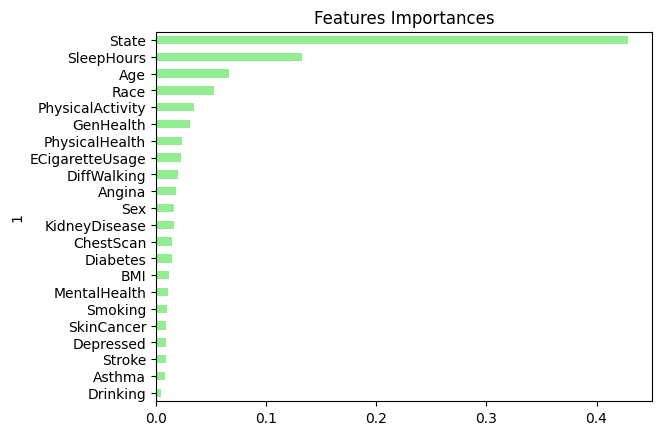

In [62]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Decision Trees Solution

In [63]:
# Define features set
X = df3.copy()
X.drop("HeartAttack", axis=1, inplace=True)
X.head()

,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepHours,Angina,Stroke,Asthma,SkinCancer,...,KidneyDisease,Diabetes,DiffWalking,Smoking,ECigaretteUsage,ChestScan,Race,Age,BMI,Drinking
342,0,Very good,4.0,0.0,0,9.0,0,0,0,0,...,0,No,0,Former smoker,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 65 to 69,27.99,0
343,1,Very good,0.0,0.0,0,6.0,0,0,0,0,...,0,Yes,0,Former smoker,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 70 to 74,30.13,0
345,1,Very good,0.0,0.0,1,8.0,0,0,0,0,...,0,No,1,Former smoker,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",Age 75 to 79,31.66,1
346,0,Fair,5.0,0.0,0,9.0,0,0,0,1,...,0,No,1,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 80 or older,31.32,0
347,0,Good,3.0,15.0,0,5.0,0,0,0,0,...,0,No,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 80 or older,33.07,0


In [64]:
y = df3["HeartAttack"].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [65]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [66]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [67]:
# Encoding categorical features
X_train_encoded = pd.get_dummies(X_train, columns=["GenHealth"])

# Identify non-numerical columns
non_numeric_cols = X_train_encoded.select_dtypes(exclude=['number']).columns

# Convert non-numerical columns to numerical (example using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])

# Fitting Standard Scaler after encoding
X_scaler = scaler.fit(X_train_encoded)

In [68]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train_encoded) # Use the encoded training data

# Encoding and scaling the test data
X_test_encoded = pd.get_dummies(X_test, columns=["GenHealth"]) # One-hot encode the test data
non_numeric_cols_test = X_test_encoded.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols_test:
    X_test_encoded[col] = label_encoder.fit_transform(X_test_encoded[col]) # Use the same label encoder as for training data
X_test_scaled = X_scaler.transform(X_test_encoded) # Transform the encoded test data

## Fitting the Decision Tree Model

In [69]:
# Import dependencies
from sklearn import tree

# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [70]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

In [72]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

In [73]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [74]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2664,189
Actual 1,124,69


Accuracy Score : 0.897242284963887
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2853
           1       0.27      0.36      0.31       193

    accuracy                           0.90      3046
   macro avg       0.61      0.65      0.63      3046
weighted avg       0.91      0.90      0.90      3046



In [119]:
import numpy as np
from sklearn.model_selection import train_test_split

x = np.arange(24).reshape((12, 2))
y = np.arange(12)

x_train, x_Combine, y_train, y_Combine = train_test_split(x, y,
                                                          train_size=0.8,
                                                          random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_Combine, y_Combine,
                                                          train_size=0.5,
                                                          random_state=42)

# Training set
print("Training set x: ", x_train)
print("Training set y: ", y_train)
print("  ")

# Validation set
print("Validation set x: ", x_val)
print("Validation set y: ", y_val)

# Test set
print("Test set x: ", x_test)
print("Test set y: ", y_test)

Training set x:  [[16 17]
 [10 11]
 [ 4  5]
 [ 2  3]
 [22 23]
 [ 8  9]
 [14 15]
 [ 6  7]
 [12 13]]
Training set y:  [ 8  5  2  1 11  4  7  3  6]
  
Validation set x:  [[0 1]]
Validation set y:  [0]
Test set x:  [[20 21]
 [18 19]]
Test set y:  [10  9]
